In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix
from sklearn.utils import shuffle
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape, Dense, Dropout, Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers.schedules import ExponentialDecay
from keras.models import load_model
from itertools import chain

pd.options.mode.chained_assignment = None  # default='warn'
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.optimizers import schedules

In [ ]:
exoTrain = pd.read_csv("/content/drive/MyDrive/IYRC Research/IYRC Submission Material/exoTrain.csv")
exoTest = pd.read_csv("/content/drive/MyDrive/IYRC Research/IYRC Submission Material/exoTest.csv")
exoTrain.head(5)

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


In [ ]:
exoTrain["LABEL"] = exoTrain["LABEL"].replace(1,0)
exoTrain["LABEL"] = exoTrain["LABEL"].replace(2,1)

exoTest["LABEL"] = exoTest["LABEL"].replace(1,0)
exoTest["LABEL"] = exoTest["LABEL"].replace(2,1)

In [ ]:
print(exoTrain['LABEL'].value_counts())
print(exoTest['LABEL'].value_counts())

0    5050
1      37
Name: LABEL, dtype: int64
0    565
1      5
Name: LABEL, dtype: int64


In [ ]:
def smote(x_train, y_train):
    #smote = SMOTE(random_state=17, sampling_strategy='minority')
    over = SMOTE(sampling_strategy=0.2)
    under = RandomUnderSampler(sampling_strategy=0.3)
    steps = [('o', over), ('u', under)]
    pipeline = Pipeline(steps=steps)
    x_train_res, y_train_res = pipeline.fit_resample(x_train, y_train)

    return x_train_res, y_train_res

In [ ]:
Xtrain = exoTrain.drop(["LABEL"], axis=1).to_numpy()
Xtest = exoTest.drop(["LABEL"], axis=1).to_numpy()

ytrain = exoTrain["LABEL"].to_numpy()
yest = exoTest["LABEL"].to_numpy()

Text(0.5, 0, 'Time [hours]')

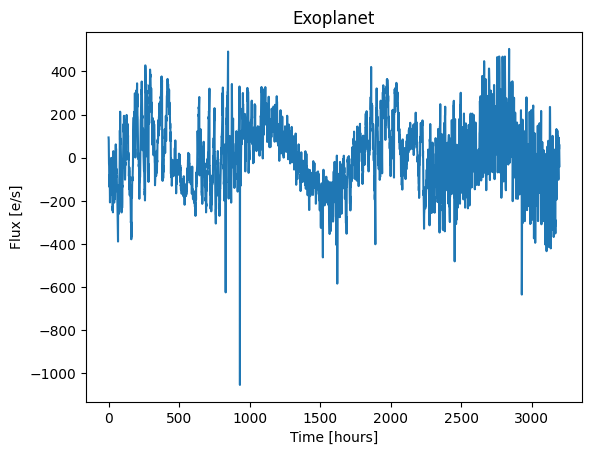

In [ ]:
plt.plot(Xtrain[0])
plt.title("Exoplanet")
plt.ylabel('Flux [e/s]')
plt.xlabel('Time [hours]')

Text(0.5, 0, 'Time [hours]')

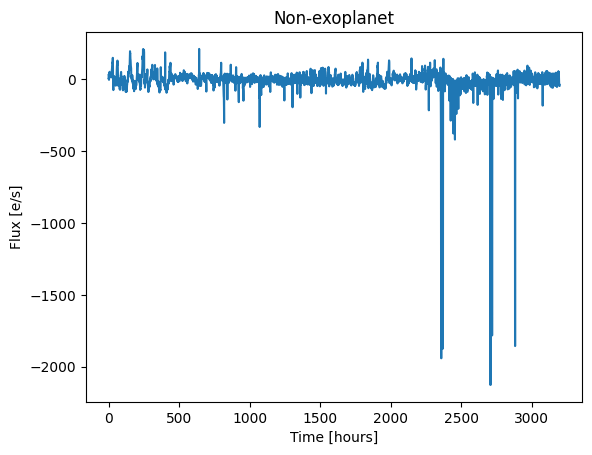

In [ ]:
plt.plot(Xtrain[100])
plt.title("Non-exoplanet")
plt.ylabel('Flux [e/s]')
plt.xlabel('Time [hours]')

In [ ]:
from scipy.fftpack import fft

# Apply a Fourier transformation since we are looking for a periodic modulation of the brightness
Xtrain=np.abs(fft(Xtrain,n=len(Xtrain[0]),axis=1))
Xtest=np.abs(fft(Xtest,n=len(Xtest[0]),axis=1))

# Take half of the Fourier spectrum since it is symmetric
Xtrain=Xtrain[:,:1+int((len(Xtrain[0])-1)/2)]

print('Shape of Xtrain:',np.shape(Xtrain),'\nShape of ytrain:',np.shape(ytrain))

Xtest=Xtest[:,:1+int((len(Xtest[0])-1)/2)]


Shape of Xtrain: (5087, 1599) 
Shape of ytrain: (5087,)


<Figure size 100x100 with 0 Axes>

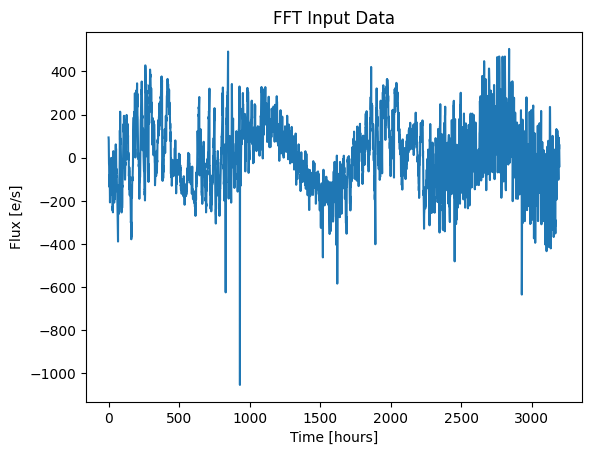

<Figure size 100x100 with 0 Axes>

In [ ]:
# GRAPH FOR FFT
after_fft = exoTrain.drop(["LABEL"], axis=1).iloc[0].to_numpy()
before_fft = exoTrain.drop(["LABEL"], axis=1).iloc[0].to_numpy()

after_fft = np.abs(fft(after_fft))


plt.plot(before_fft)
plt.title("FFT Input Data")
plt.ylabel('Flux [e/s]')
plt.xlabel('Time [hours]')
plt.figure(figsize=(1, 1))


<Figure size 100x100 with 0 Axes>

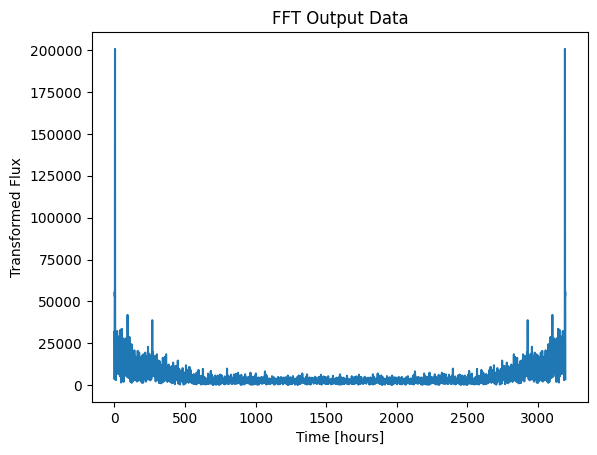

<Figure size 100x100 with 0 Axes>

In [ ]:
plt.plot(after_fft)
plt.title("FFT Output Data")
plt.ylabel('Transformed Flux')
plt.xlabel('Time [hours]')
plt.figure(figsize=(1, 1))

In [ ]:
from sklearn.preprocessing import normalize

# To reduce the large values we got in the fft, normalize the data
Xtrain=normalize(Xtrain)
Xtest=normalize(Xtest)


<Figure size 100x100 with 0 Axes>

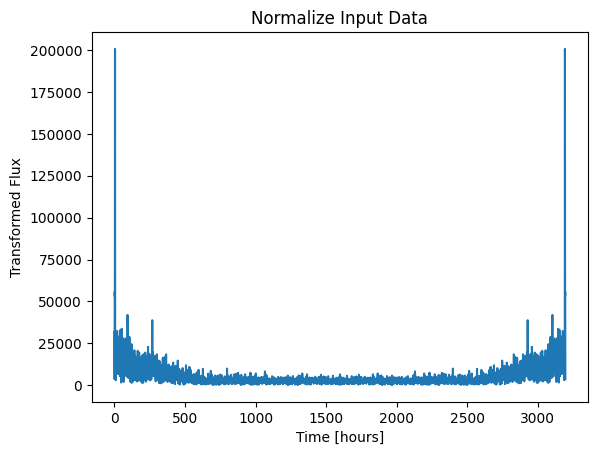

<Figure size 100x100 with 0 Axes>

In [ ]:
# GRAPH FOR NORMALIZE
before_normalize = after_fft
after_normalize = Xtrain[0]

plt.plot(after_fft)
plt.title("Normalize Input Data")
plt.ylabel('Transformed Flux')
plt.xlabel('Time [hours]')
plt.figure(figsize=(1, 1))

<Figure size 100x100 with 0 Axes>

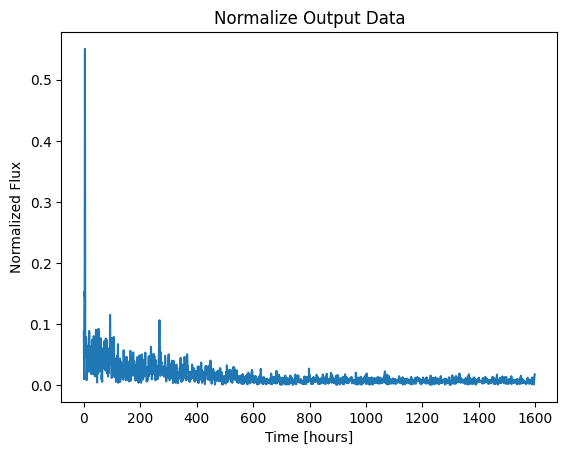

<Figure size 100x100 with 0 Axes>

In [ ]:
plt.plot(after_normalize)
plt.title("Normalize Output Data")
plt.ylabel('Normalized Flux')
plt.xlabel('Time [hours]')
plt.figure(figsize=(1, 1))

In [ ]:
from scipy import ndimage

# Still quite messy, so apply a Gaussian filter

Xtrain=ndimage.filters.gaussian_filter(Xtrain,sigma=10)
Xtest=ndimage.filters.gaussian_filter(Xtest,sigma=10)

<ipython-input-16-e2650682eef1>:5: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Xtrain=ndimage.filters.gaussian_filter(Xtrain,sigma=10)
<ipython-input-16-e2650682eef1>:6: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  Xtest=ndimage.filters.gaussian_filter(Xtest,sigma=10)


<Figure size 100x100 with 0 Axes>

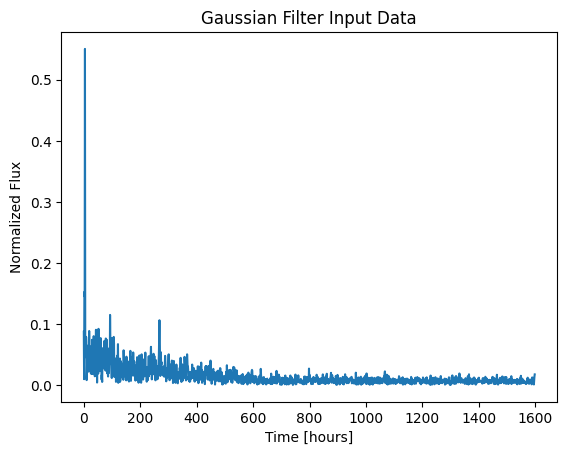

<Figure size 100x100 with 0 Axes>

In [ ]:
# GRAPH FOR GAUSSIAN FILTER

plt.plot(after_normalize)
plt.title("Gaussian Filter Input Data")
plt.ylabel('Normalized Flux')
plt.xlabel('Time [hours]')
plt.figure(figsize=(1, 1))

<Figure size 100x100 with 0 Axes>

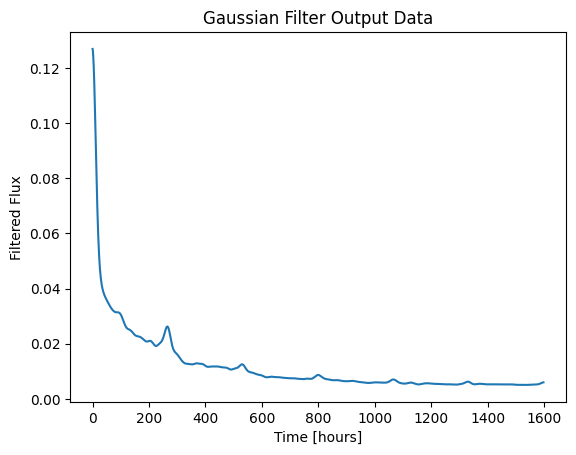

<Figure size 100x100 with 0 Axes>

In [ ]:

plt.plot(Xtrain[0])
plt.title("Gaussian Filter Output Data")
plt.ylabel('Filtered Flux')
plt.xlabel('Time [hours]')
plt.figure(figsize=(1, 1))

<Figure size 100x100 with 0 Axes>

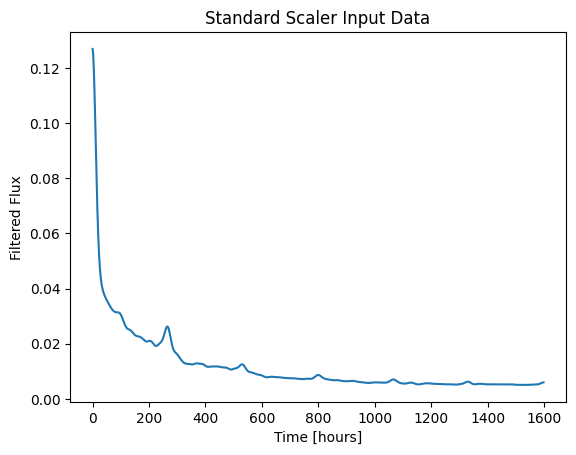

<Figure size 100x100 with 0 Axes>

In [ ]:
plt.plot(Xtrain[0])
plt.title("Standard Scaler Input Data")
plt.ylabel('Filtered Flux')
plt.xlabel('Time [hours]')
plt.figure(figsize=(1, 1))

In [ ]:
from sklearn.preprocessing import StandardScaler

# Common ranges of values are favoured by alomst all ML algorithms -> rescale

scaler=StandardScaler()
Xtrain=scaler.fit_transform(Xtrain)
Xtest=scaler.fit_transform(Xtest)

<Figure size 100x100 with 0 Axes>

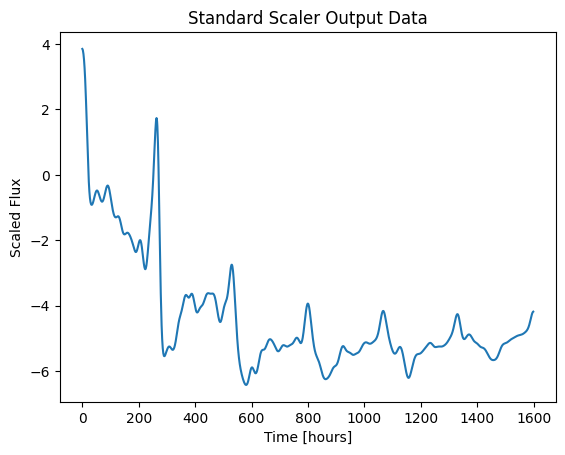

<Figure size 100x100 with 0 Axes>

In [ ]:
# GRAPH FOR STANDARD SCALER
plt.plot(Xtrain[0])
plt.title("Standard Scaler Output Data")
plt.ylabel('Scaled Flux')
plt.xlabel('Time [hours]')
plt.figure(figsize=(1, 1))

In [ ]:
x_train_res, y_train_res = smote(Xtrain, ytrain)